In [1]:
import cv2 as cv
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D  

In [2]:
train_az = pd.read_csv('D:\STUDY\AUTONOMOUS/A_Z Handwritten Data.csv').values

In [3]:
train_az.shape

(372450, 785)

In [4]:
y_train = train_az[:,1:]    #images
x_train = train_az[:,:1]    #predication numbers LABELS

y_train = np.reshape(y_train,(372450,28,28,1)) #28,28 in 1D

y_train = y_train/255

In [5]:
x_train.shape

(372450, 1)

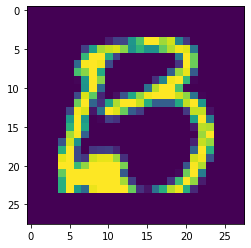

In [6]:
plt.imshow(y_train[15000])

In [7]:
model = Sequential()

model.add(Conv2D(28, kernel_size = (3,3),input_shape = (28,28,1)))#shape of input passing
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128,activation = tf.nn.relu))
model.add(Dropout(0.2))

model.add(Dense(27,activation = tf.nn.softmax)) #27 values to predict gives prob distri

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [8]:
model.fit(x = y_train,y = x_train, epochs = 2)   #feature,label

Epoch 1/2
11640/11640 [==============================] - 169s 14ms/step - loss: 0.3756 - accuracy: 0.8935
Epoch 2/2
11640/11640 [==============================] - 163s 14ms/step - loss: 0.1099 - accuracy: 0.9683


In [9]:
model.evaluate(y_train,x_train)

11640/11640 [==============================] - 51s 4ms/step - loss: 0.0495 - accuracy: 0.9857


[0.04949435964226723, 0.9856598377227783]

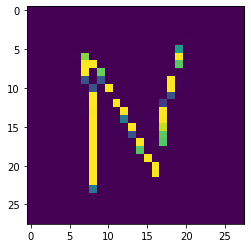

Number of img is :  13


In [10]:
img = cv.imread('D:\STUDY\AUTONOMOUS/N.jpeg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = gray/255.
gray = 1.- gray #to invert number and colour

gray = cv.resize(gray,(28,28))

plt.imshow(gray)
plt.show()

gray = np.reshape(gray,(1,28,28,1))    #to comapre to mnist 

print ("Number of img is : ",np.argmax(model.predict(gray)))  #to pass gray img,10 values deduced with DENSE layer
result = model.predict(gray)                                  #ARGMAX gives us return which has max value/prob


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 27)                3483      
Total params: 609,587
Trainable params: 609,587
Non-trainable params: 0
__________________________________________________

In [12]:
model.save('Alphabet7_epoch.h5')